In [1]:
from initial_cleaning import initial_cleaning

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

%matplotlib inline
sns.set_style('white')
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set_context('notebook', font_scale=1.5)

In [2]:
mall = pd.DataFrame(initial_cleaning('/Users/jamilab/Data_Science/Data_Sets/Mall_Customers.csv'))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [3]:
# count rows & columns

mall.shape

(200, 5)

In [4]:
# drop customer id column

mall = mall.drop(['CustomerID'], 1)

In [5]:
# rename columns

mall = mall.rename(columns={'Annual Income (k$)' : 'Annual_Income', 'Spending Score (1-100)' : 'Spend_Score'})

In [6]:
# check data types

mall.dtypes

Gender           object
Age               int64
Annual_Income     int64
Spend_Score       int64
dtype: object

In [7]:
mall.describe()

,Age,Annual_Income,Spend_Score
count,200.000,200.000,200.000
mean,38.850,60.560,50.200
std,13.969,26.265,25.824
min,18.000,15.000,1.000
25%,28.750,41.500,34.750
50%,36.000,61.500,50.000
75%,49.000,78.000,73.000
max,70.000,137.000,99.000


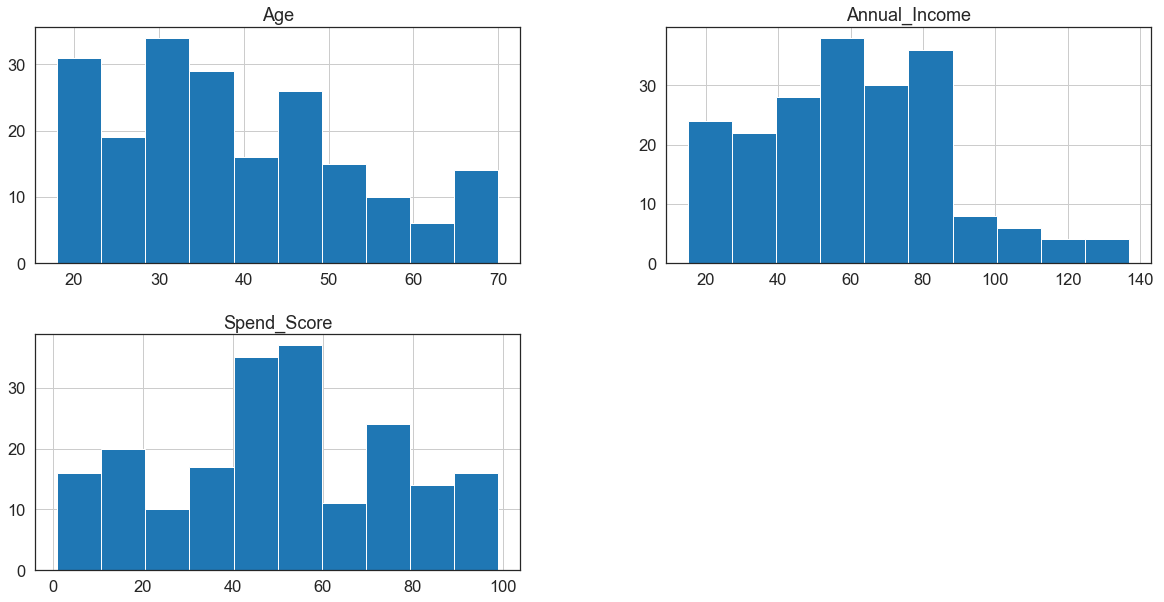

In [8]:
# Visualize the data

mall.hist()
plt.show();

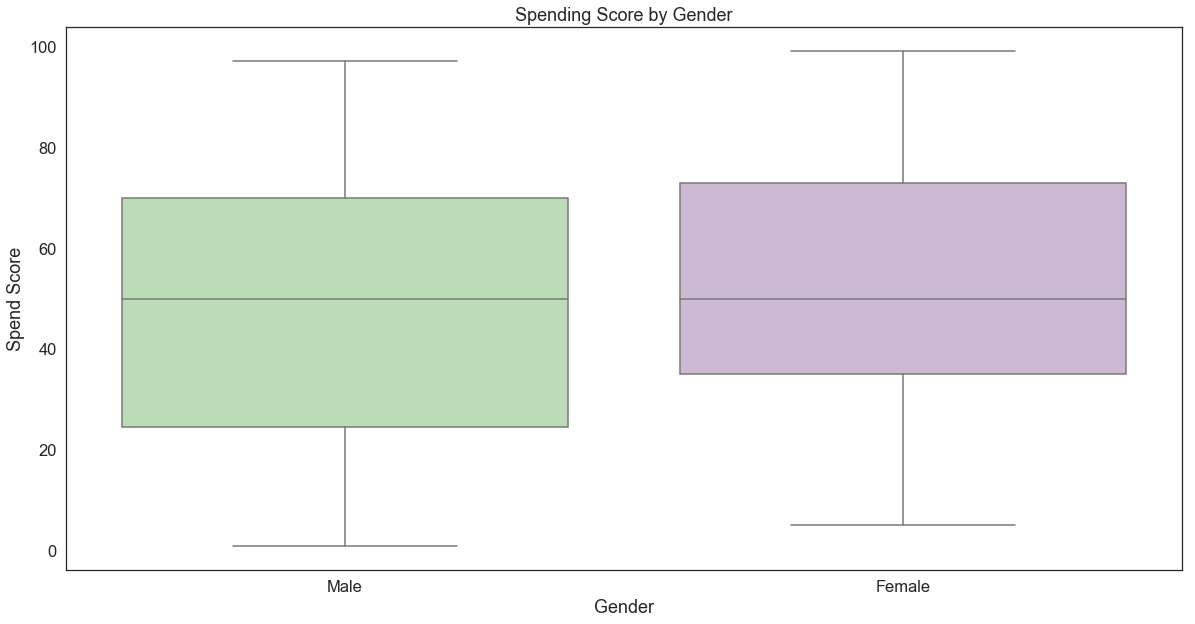

In [9]:
# spend score and age

ax = sns.boxplot(x='Gender', y='Spend_Score', data=mall, palette='PRGn_r')
plt.title('Spending Score by Gender')
ax.set(xlabel='Gender', ylabel='Spend Score')
plt.show();

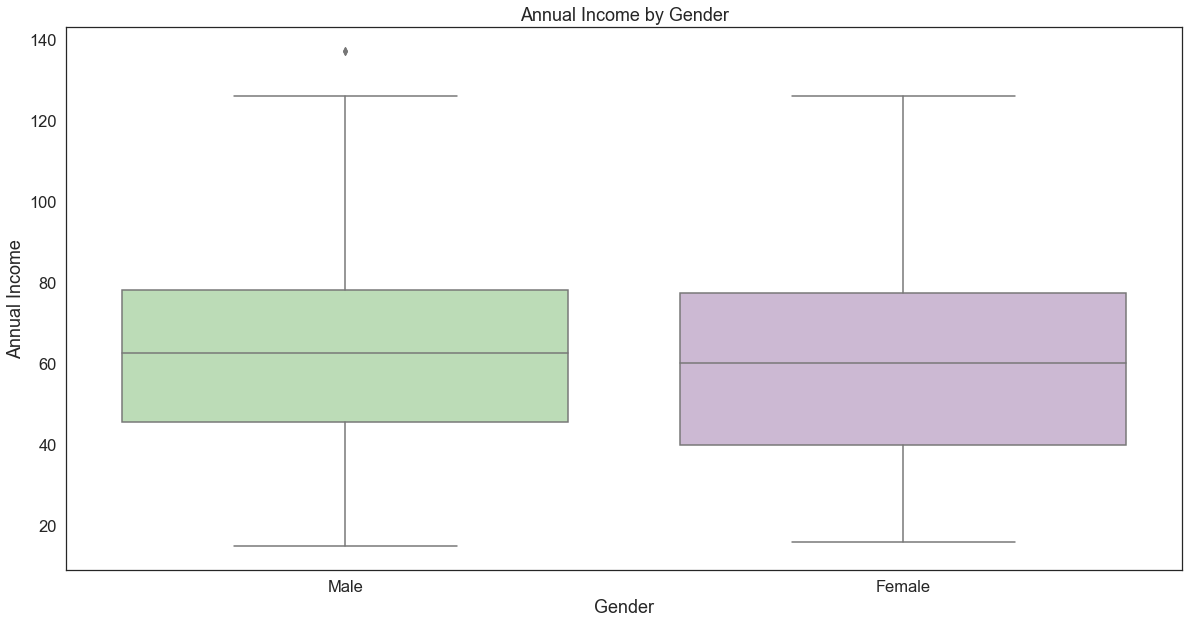

In [10]:
# spend score and age

ax = sns.boxplot(x='Gender', y='Annual_Income', data=mall, palette='PRGn_r')
plt.title('Annual Income by Gender')
ax.set(xlabel='Gender', ylabel='Annual Income')
plt.show();

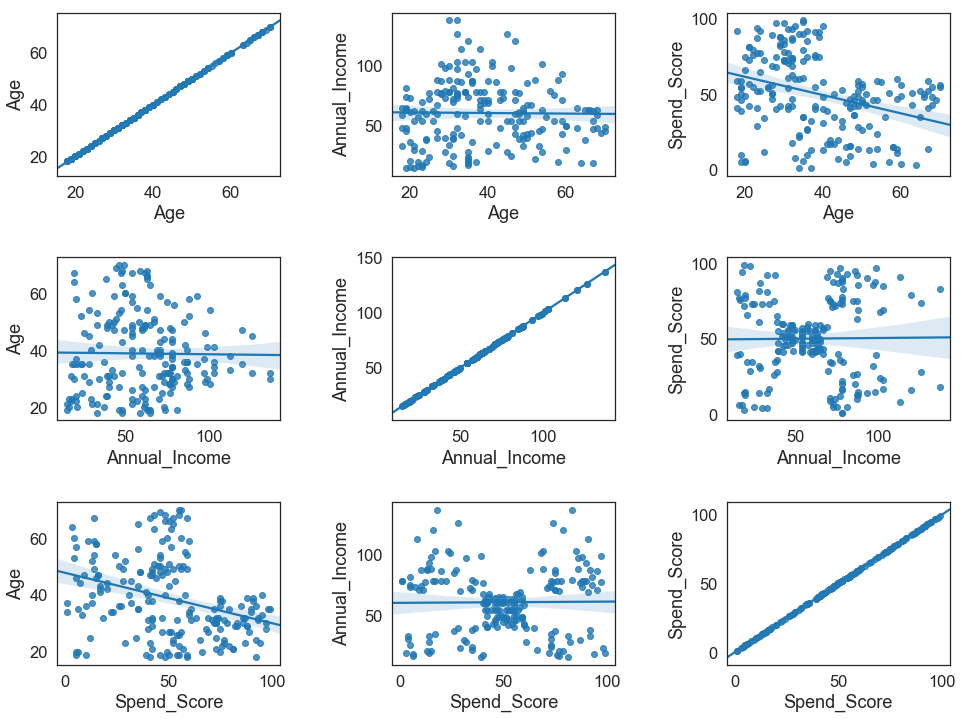

In [11]:
# use a regression plot to see correlations

plt.figure(1 , figsize = (16 , 12))
n = 0 
for x in ['Age' , 'Annual_Income' , 'Spend_Score']:
    for y in ['Age' , 'Annual_Income' , 'Spend_Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = mall)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show();

In [12]:
# Age and Spending Score

X = mall[['Age' , 'Spend_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

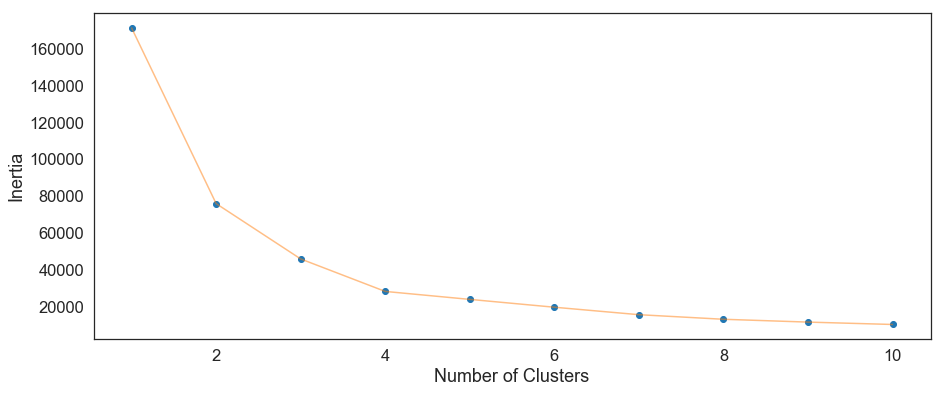

In [13]:
# plot for optimal number of clusters

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [14]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

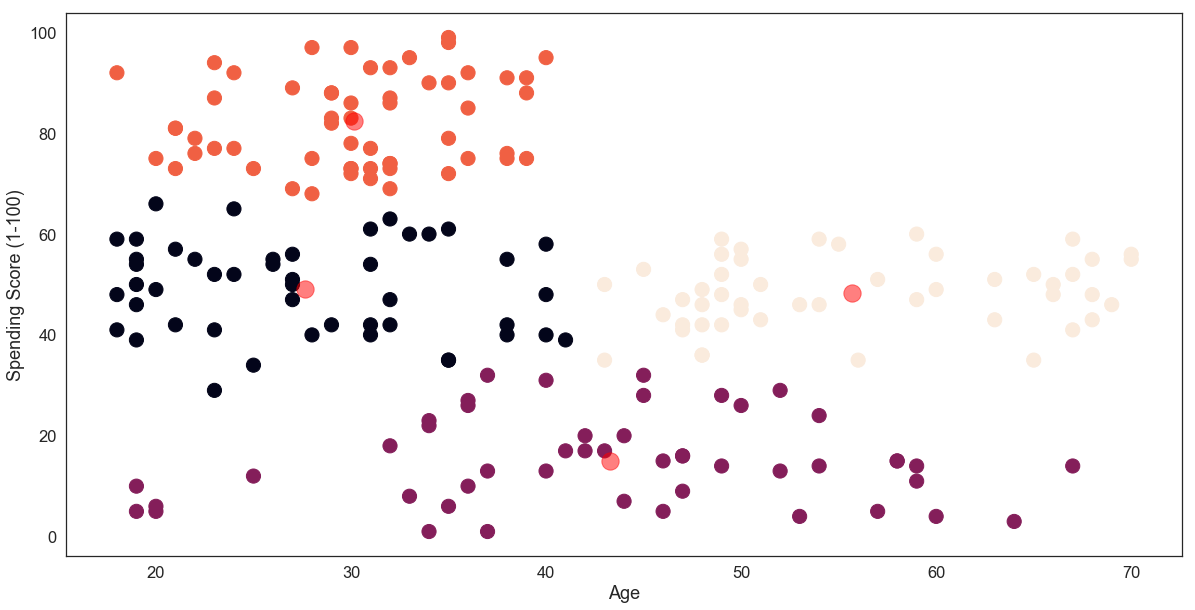

In [15]:
plt.clf()
plt.scatter( x = 'Age' ,y = 'Spend_Score' , data = mall , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [16]:
# Annual Income and Spending Score

X2 = mall[['Annual_Income' , 'Spend_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

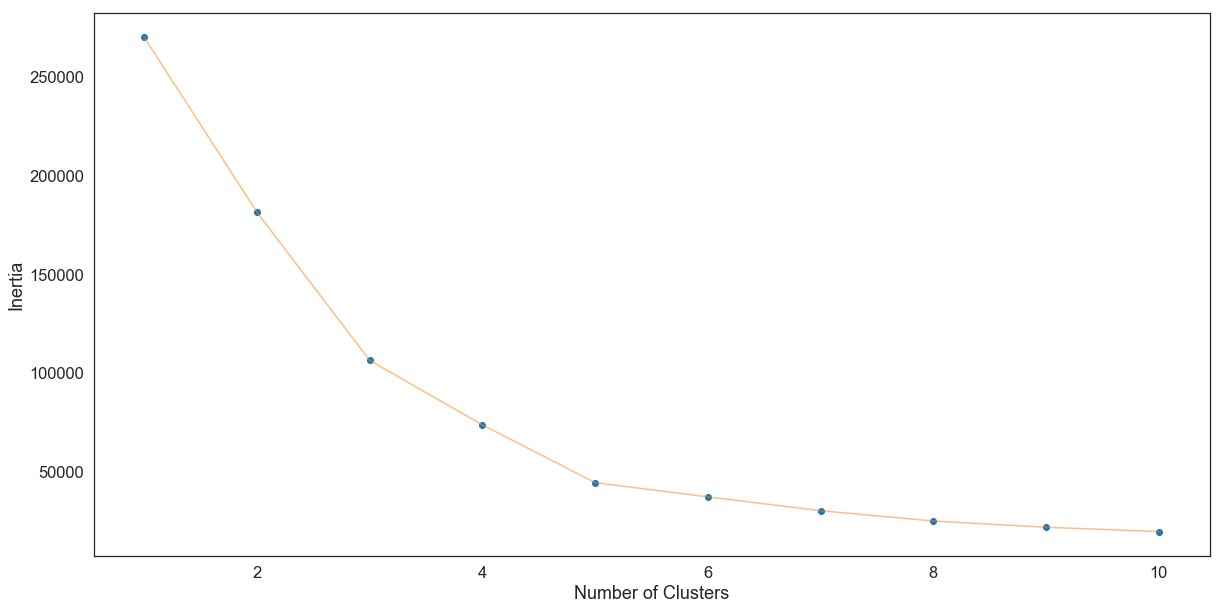

In [17]:
# plot for optimal number of clusters

plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show();

In [18]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

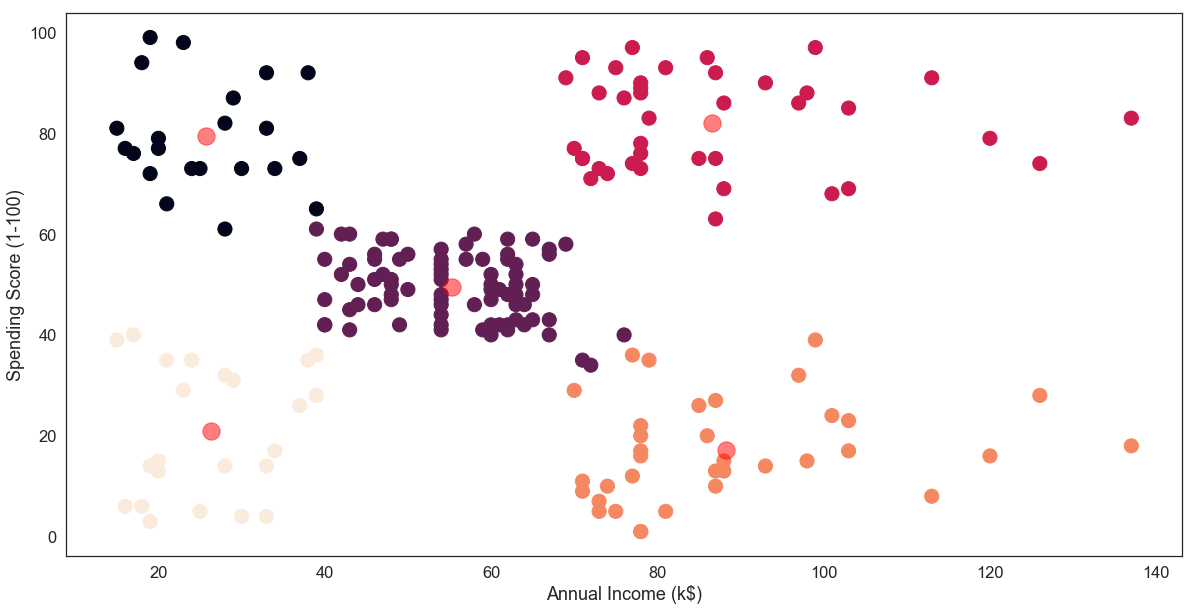

In [19]:
plt.clf()
plt.scatter( x = 'Annual_Income' ,y = 'Spend_Score' , data = mall , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show();

In [20]:
# Segmenting age, annual income & spend score

X3 = mall[['Age' , 'Annual_Income' ,'Spend_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

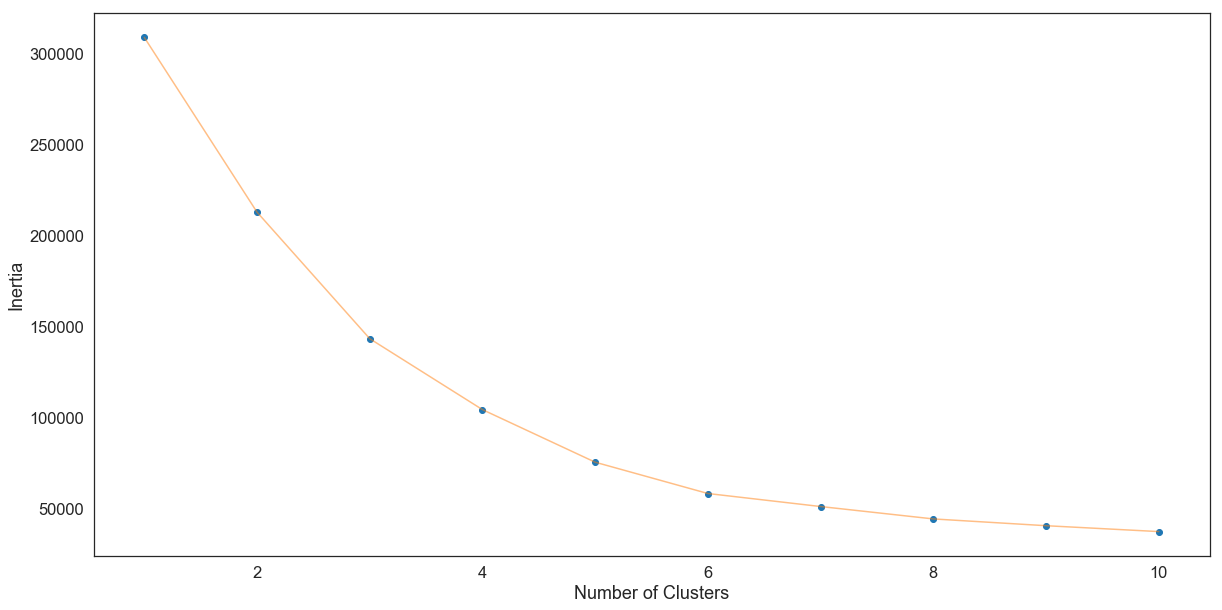

In [21]:
# plot optimal number of clusters

plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [22]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [25]:
import plotly as py
import plotly.graph_objs as go

mall['label3'] =  labels3
trace1 = go.Scatter3d(
    x= mall['Age'],
    y= mall['Spend_Score'],
    z= mall['Annual_Income'],
    mode='markers',
     marker=dict(
        color = mall['label3'], 
        size= 20,
        line=dict(
            color= mall['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)